In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np


In [29]:

# Wczytanie danych z pliku CSV
data_file = "simulation_results.csv"
df = pd.read_csv(data_file)

In [30]:
# Wyświetlenie pierwszych kilku wierszy danych
print("Podgląd danych:")
df.head()


Podgląd danych:


,Simulation Number,Served Customers,Lost Customers,Unserved at Timeout,Failure Count,Avg Service Time (min),Avg Failure Duration (min),mean_arrival_time,std_arrival_time,min_arrival_time,...,slow_mean_service_time_next,std_service_time,min_service_time,max_service_time,failure_shape,failure_scale,failure_alpha,failure_beta,failure_min_time,failure_max_time
0,1,149,13,82,1,3.096352,10.655904,2.0,0.5,0.5,...,4.0,2.0,1.0,8.0,3.0,120.0,2.0,5.0,5.0,20.0
1,2,135,97,91,2,3.416054,7.565060,1.5,0.3,0.3,...,4.0,2.0,1.0,8.0,3.0,120.0,2.0,5.0,5.0,20.0
2,3,185,0,55,0,2.579442,0.000000,2.0,0.5,0.5,...,3.5,1.5,0.8,7.0,3.0,120.0,2.0,5.0,5.0,20.0
3,4,150,32,55,1,3.128337,7.253783,2.0,0.5,0.5,...,4.0,2.0,1.0,8.0,2.5,100.0,2.0,5.0,5.0,20.0
4,5,151,0,95,0,3.168954,0.000000,2.0,0.5,0.5,...,4.0,2.0,1.0,8.0,3.0,120.0,1.8,4.5,4.0,18.0


In [31]:

# Podstawowe statystyki opisowe
print("\nPodstawowe statystyki opisowe:")
df.describe()



Podstawowe statystyki opisowe:


,Simulation Number,Served Customers,Lost Customers,Unserved at Timeout,Failure Count,Avg Service Time (min),Avg Failure Duration (min),mean_arrival_time,std_arrival_time,min_arrival_time,...,slow_mean_service_time_next,std_service_time,min_service_time,max_service_time,failure_shape,failure_scale,failure_alpha,failure_beta,failure_min_time,failure_max_time
count,20.00000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.00000,...,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000
mean,10.50000,145.600000,26.100000,77.250000,0.850000,3.229847,7.350017,1.940000,0.46500,0.46500,...,4.040000,1.955000,0.995000,8.100000,2.975000,119.000000,2.025000,5.050000,5.100000,20.250000
std,5.91608,13.112469,24.252835,24.339431,0.587143,0.254655,5.068150,0.163514,0.09333,0.09333,...,0.281724,0.153811,0.068633,0.575829,0.129269,5.525063,0.129269,0.276253,0.552506,1.292692
min,1.00000,126.000000,0.000000,43.000000,0.000000,2.579442,0.000000,1.500000,0.20000,0.20000,...,3.500000,1.500000,0.800000,7.000000,2.500000,100.000000,1.800000,4.500000,4.000000,18.000000
25%,5.75000,138.750000,6.000000,62.000000,0.750000,3.128383,4.005376,2.000000,0.50000,0.50000,...,4.000000,2.000000,1.000000,8.000000,3.000000,120.000000,2.000000,5.000000,5.000000,20.000000
50%,10.50000,145.500000,26.000000,73.000000,1.000000,3.219972,8.029425,2.000000,0.50000,0.50000,...,4.000000,2.000000,1.000000,8.000000,3.000000,120.000000,2.000000,5.000000,5.000000,20.000000
75%,15.25000,149.250000,34.000000,86.500000,1.000000,3.336917,10.030858,2.000000,0.50000,0.50000,...,4.000000,2.000000,1.000000,8.000000,3.000000,120.000000,2.000000,5.000000,5.000000,20.000000
max,20.00000,185.000000,97.000000,150.000000,2.000000,3.727067,16.527884,2.200000,0.60000,0.60000,...,5.000000,2.200000,1.200000,10.000000,3.200000,130.000000,2.500000,6.000000,7.000000,25.000000


In [32]:
COLUMNS_TO_ANALYZE = [
    'mean_arrival_time', 'std_arrival_time', 'min_arrival_time', 'mean_service_time',
    'slow_mean_service_time_first', 'slow_mean_service_time_next', 'std_service_time',
    'min_service_time', 'max_service_time', 'failure_shape', 'failure_scale',
    'failure_alpha', 'failure_beta', 'failure_min_time', 'failure_max_time'
]

drop_columns = [
    'Simulation Number', 'Unserved at Timeout', 'Failure Count',
    'Avg Service Time (min)', 'Avg Failure Duration (min)'
]
# # Usunięcie niepotrzebnych kolumn
df_only_relevant = df.drop(columns=drop_columns)

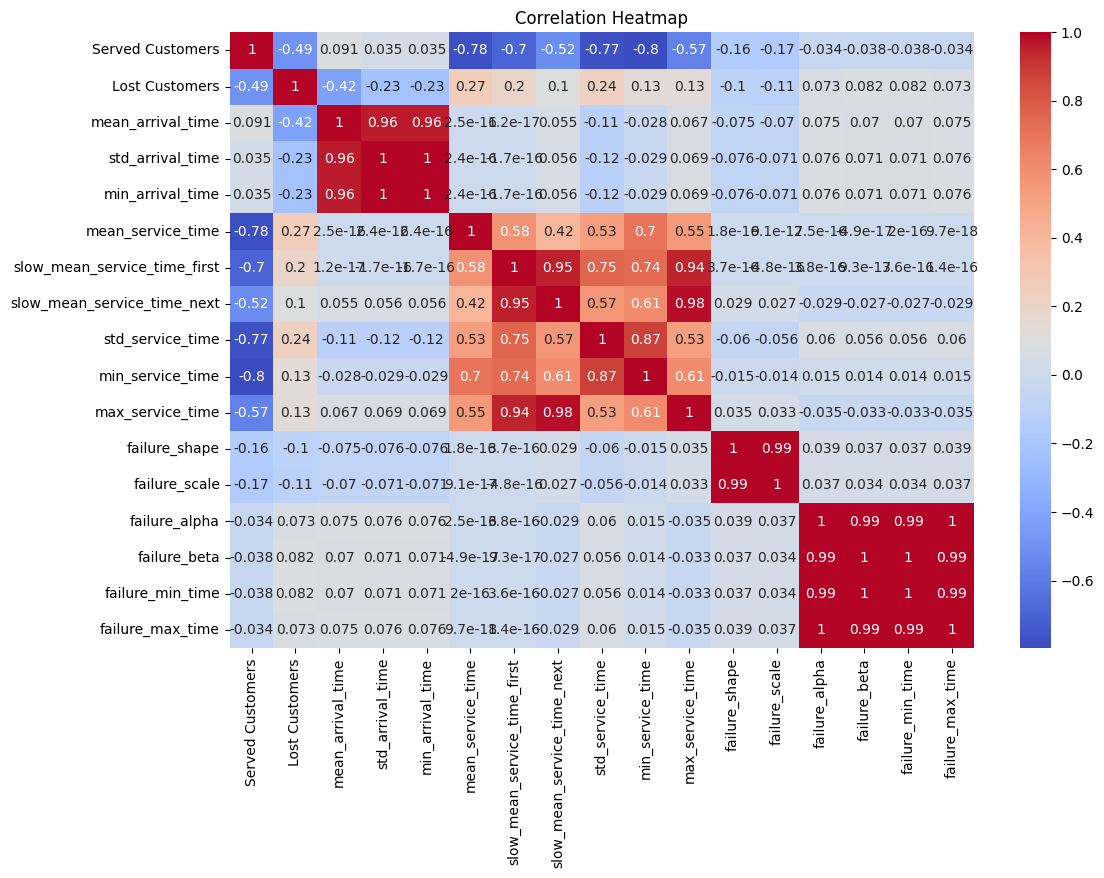

In [33]:
correlations = df_only_relevant.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlations, annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [35]:
# testy statystyczne T served customers dla jednej próbki o wartości 150
#teza: średnia liczba obsłużonych klientów jest równa 150
# H0: μ = 150
# H1: μ ≠ 150
# Test t dla jednej próbki
t, p = stats.ttest_1samp(df['Served Customers'], 150)
print(f"\nTest t dla jednej próbki: t={t}, p={p}")
if p < 0.05:
    print("Odrzucamy hipotezę zerową: średnia liczba obsłużonych klientów różni się od 150.")
else:
    print("Nie odrzucamy hipotezy zerowej: średnia liczba obsłużonych klientów nie różni się od 150.")

mean_value = df['Served Customers'].mean()
std_dev = df['Served Customers'].std()

print(f"Średnia liczba obsłużonych klientów: {mean_value:.2f}")
print(f"Odchylenie standardowe: {std_dev:.2f}")




Test t dla jednej próbki: t=-1.5006630916716546, p=0.1498781010565272
Nie odrzucamy hipotezy zerowej: średnia liczba obsłużonych klientów nie różni się od 150.
Średnia liczba obsłużonych klientów: 145.60
Odchylenie standardowe: 13.11


In [ ]:

# Testy statystyczne (np. test t-Studenta dla dwóch grup)
print("\nTest t-Studenta dla 'Served Customers' i 'Lost Customers':")
t_stat, p_value = stats.ttest_ind(df["Served Customers"], df["Lost Customers"], equal_var=False)
print(f"t-stat={t_stat:.4f}, p={p_value:.4f}")
# Hipoteza zerowa: średnia liczba obsłużonych klientów jest równa średniej liczby utraconych klientów
# H0: μ_served = μ_lost
# H1: μ_served ≠ μ_lost
if p_value < 0.05:
    print("  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.")
else:
    print("  Nie odrzucamy hipotezy zerowej - różnice nie są istotne statystycznie.")


Test t-Studenta dla 'Served Customers' i 'Lost Customers':
t-stat=19.3837, p=0.0000
  Odrzucamy hipotezę zerową - różnice są istotne statystycznie.


In [37]:
import statsmodels.api as sm

# Wybór zmiennych niezależnych (predyktorów) i zmiennej zależnej
X = df_only_relevant[COLUMNS_TO_ANALYZE]  # Zmienna niezależna
y = df_only_relevant['Served Customers']  # Zmienna zależna

# Dodanie stałej do modelu (intercept)
X = sm.add_constant(X)

# Dopasowanie modelu regresji wielorakiej
model = sm.OLS(y, X).fit()

# Wyświetlenie podsumowania wyników
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:       Served Customers   R-squared:                       0.879
Model:                            OLS   Adj. R-squared:                  0.712
Method:                 Least Squares   F-statistic:                     5.278
Date:                Sun, 18 May 2025   Prob (F-statistic):             0.0130
Time:                        22:17:05   Log-Likelihood:                -58.226
No. Observations:                  20   AIC:                             140.5
Df Residuals:                       8   BIC:                             152.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           